# Covid19 Analysis Demo
This jupyter notebook allows one to compare groups of states using the data from covidtracking.com
in a per capita basis or with raw numbers...

In [1]:
from covid19 import *
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
cdata = get_covid_data()

In [16]:
stateData = json.load(open("states.json","r"))
states = {
    "AL": "Alabama",
    "AK": "Alaska",
    #"AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    #"DC": "District Of Columbia",
    #"FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    #"GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    #"MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    #"MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    #"PW": "Palau",
    "PA": "Pennsylvania",
    #"PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    #"VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"
}
len(states.keys())

50

In [4]:
len(cdata[0])
states['WA']
stateData['data'][0]

def statePop(state):
    x = [d['Pop'] for d in stateData['data'] if d['State']==states[state]]
    return x[0]
statePop('NY')



19440469

In [5]:
cdata[0][10]

{'date': 20200710,
 'state': 'FL',
 'positive': 244151,
 'negative': 2177476,
 'pending': 1911,
 'hospitalizedCurrently': 6974,
 'hospitalizedCumulative': 17916,
 'inIcuCurrently': None,
 'inIcuCumulative': None,
 'onVentilatorCurrently': None,
 'onVentilatorCumulative': None,
 'recovered': None,
 'dataQualityGrade': 'A',
 'lastUpdateEt': '7/9/2020 23:59',
 'dateModified': '2020-07-09T23:59:00Z',
 'checkTimeEt': '07/09 19:59',
 'death': 4203,
 'hospitalized': 17916,
 'dateChecked': '2020-07-09T23:59:00Z',
 'totalTestsViral': 2945253,
 'positiveTestsViral': 305374,
 'negativeTestsViral': 2633526,
 'positiveCasesViral': 244151,
 'deathConfirmed': 4203,
 'deathProbable': None,
 'fips': '12',
 'positiveIncrease': 11433,
 'negativeIncrease': 52796,
 'total': 2423538,
 'totalTestResults': 2421627,
 'totalTestResultsIncrease': 64229,
 'posNeg': 2421627,
 'deathIncrease': 92,
 'hospitalizedIncrease': 437,
 'hash': '3968c03124ccdd661df0cc1695af0e15560f692c',
 'commercialScore': 0,
 'negativeReg

In [85]:
dates = sorted(list({ x['date'] for x in cdata[0]}))
dayOfPandemic={}
count=22
for d in dates:
    dayOfPandemic[d]=count
    count = count + 1
#dayOfPandemic

In [7]:
def getField(x,field):
    if field in x:
        z = x[field]
        if (z==None):
            return 0
        else:
            return z
    else:
        return 0
def getStateData(state,field):
    sd = [(x['date'],getField(x,field)) for x in cdata[0] if x['state'] == state]
    return sorted(sd)

           

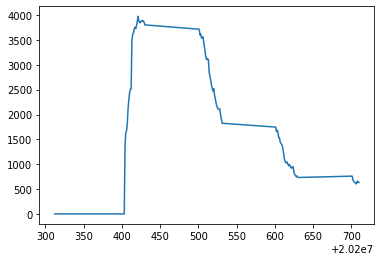

In [61]:
z = getStateData('MA','hospitalizedCurrently')
#plt.plot([x[0] for x in z],[x[1] for x in z])
def plotItems(items,field):
    plt.plot([x[0] for x in items],[x[1] for x in items],label=field)
plotItems(z,'label')

In [174]:
def collectData(states,field,perCapita):
    pop=0
    for st in states:
        pop += statePop(st)
    data={}
    for d in cdata[0]:
        s=d['state']
        if s in states:
            n = getField(d,field)
            if d['date'] in data:
                data[d['date']] += n
            else:
                data[d['date']] = n
    z = sorted(data.items())
    if perCapita:
        z = [(dayOfPandemic[d[0]],d[1]*10000/pop) for d in z]
    else:
        z = [(dayOfPandemic[d[0]],d[1]) for d in z]
        
    return z

def collectData2(states,field,perCapita):
    pop=0
    for st in states:
        pop += statePop(st)
    data={}
    for d in cdata[0]:
        s=d['state']
        if s in states:
            n = getField(d,field)
            if d['date'] in data:
                data[d['date']] += [(n,s)]
            else:
                data[d['date']] = [(n,s)]
    for d in data: 
        data[d] = sorted(data[d],reverse=True)
        #print(data[d])
    z = sorted(data.items())
    if perCapita:
        z = [(dayOfPandemic[d[0]],d[1]*10000/pop) for d in z]
    else:
        z = [(dayOfPandemic[d[0]],d[1]) for d in z]
        
    return z

collectData2(repStates,'hospitalizedCurrently',False)[-1]

(192,
 [(10002, 'TX'),
  (6974, 'FL'),
  (3432, 'AZ'),
  (2443, 'GA'),
  (1438, 'SC'),
  (1184, 'TN'),
  (1183, 'AL'),
  (1117, 'LA'),
  (1046, 'NC'),
  (981, 'MS'),
  (928, 'OH'),
  (886, 'MO'),
  (667, 'IN'),
  (653, 'PA'),
  (505, 'MI'),
  (487, 'OK'),
  (409, 'KY'),
  (402, 'AR'),
  (274, 'WI'),
  (229, 'UT'),
  (169, 'IA'),
  (100, 'NE'),
  (91, 'ID'),
  (65, 'SD'),
  (56, 'WV'),
  (33, 'ND'),
  (30, 'AK'),
  (21, 'MT'),
  (12, 'WY'),
  (0, 'KS')])

In [113]:
zz = collectData(['MA','NY','CT'],'positive',True)
zz[0:5]
x=[1,2]
x+=[4]
x

[1, 2, 4]

In [43]:

dayOfPandemic[20200122]


1

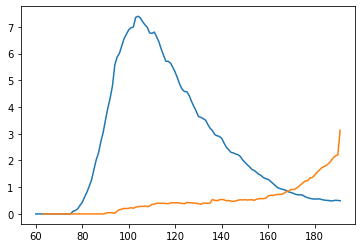

In [62]:
field = 'hospitalizedCurrently'
plotItems(collectData(['MA','NY','CT','RI','NH','VT'],field,True),field)
plotItems(collectData(['AZ','TX','OK','FL','GA','AL','MS'],field,True),field)


In [137]:
demStates = ['WA','OR','CA','NV','CO','NM',
            'MN','IL','VA','MD','DE','NJ',
            'NY','CT','RI','MA','VT','NH','ME','HI']
repStates = [s for s in states.keys() if s not in demStates]
print(demStates)
print(repStates)
len(demStates)+len(repStates)
dayOfPandemic[20200228]
cdata[0][-1]
zzz = collectData(repStates,field,True)
list(dayOfPandemic.items())[0:20]
zzz[0:50]
len(demStates)

['WA', 'OR', 'CA', 'NV', 'CO', 'NM', 'MN', 'IL', 'VA', 'MD', 'DE', 'NJ', 'NY', 'CT', 'RI', 'MA', 'VT', 'NH', 'ME', 'HI']
['AL', 'AK', 'AZ', 'AR', 'FL', 'GA', 'ID', 'IN', 'IA', 'KS', 'KY', 'LA', 'MI', 'MS', 'MO', 'MT', 'NE', 'NC', 'ND', 'OH', 'OK', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'WV', 'WI', 'WY']


20

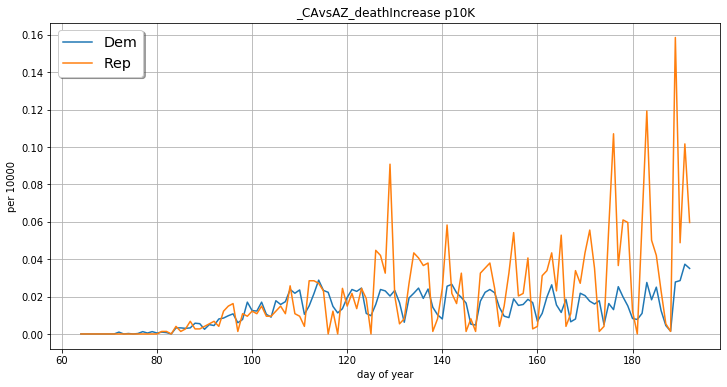

In [186]:
blueStates = ['CA'] 
redStates = ['AZ'] 
flag="_CAvsAZ_"

#blueStates =  demStates
#redStates = repStates
#flag="_2020Election_"

plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots()
#field = 'positiveIncrease'
field = 'deathIncrease'
#field="hospitalizedCurrently"
perCapita=True
plotItems(collectData(blueStates,field,perCapita),'Dem')
plotItems(collectData(redStates,field,perCapita),'Rep')
ax.set(xlabel='day of year',ylabel='per 10000' if perCapita else "raw numbers",title=flag+field+(" p10K" if perCapita else " raw"))
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
ax.grid()
fig.savefig("plot_"+flag+field+("_p10k" if perCapita else "_raw")+".png")
